# Custom Datasets

In [12]:
import requests
import zipfile
from pathlib import Path

In [13]:
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"
if image_path.is_dir():
    print(f"Directory {image_path} already exists.")
else:
    print(f"Creating directory {image_path}...")
    image_path.mkdir(parents=True)

zip_file = "pizza_steak_sushi.zip"

# Check if file already exists
if (data_path / zip_file).is_file():
    print(f"File {zip_file} already exists.")
else:
    # Download data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        print("Downloading pizza_steak_sushi.zip...")
        url = "https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip"
        response = requests.get(url)
        f.write(response.content)
        print("pizza_steak_sushi.zip downloaded!")
    
# Check if pizza_steak_sushi dir is empty
if len(list(image_path.glob("*"))) == 0:
    print(f"Extracting {zip_file}...")
    with zipfile.ZipFile(data_path / zip_file, "r") as zip_ref:
        zip_ref.extractall(image_path)
    print(f"{zip_file} extracted!")

Directory data\pizza_steak_sushi already exists.
File pizza_steak_sushi.zip already exists.


In [14]:
import os
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


random image path: data\pizza_steak_sushi\test\sushi\2394442.jpg
random image class: sushi
random image size: (512, 408)
random image height: 408
random image width: 512


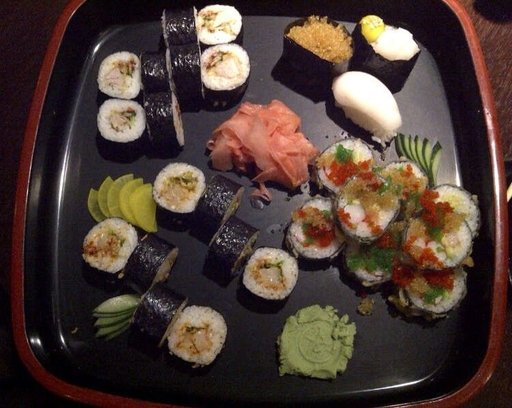

In [20]:
# Visualizing images
import random
from PIL import Image

random.seed(42)

# get all image paths
image_path_list = list(image_path.glob("**/*.jpg"))

# randomly choose image
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.name

# view image
img = Image.open(random_image_path)
print(f"random image path: {random_image_path}")
print(f"random image class: {image_class}")
print(f"random image size: {img.size}")
print(f"random image height: {img.height}")
print(f"random image width: {img.width}")

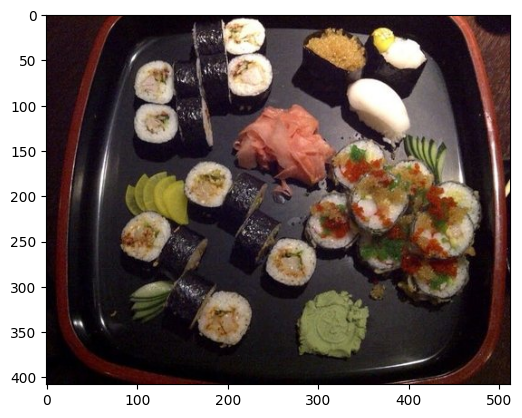

In [23]:
# Visualizing image with matplotlib
import matplotlib.pyplot as plt
import numpy as np
image_array = np.array(img)
plt.imshow(image_array)

In [25]:
# Transforming images to tensors
import torch
from torch.utils.data import DataLoader
from torchvision import transforms

In [27]:
# Write a transform for images
data_transform = transforms.Compose([
    # resize to 64x64
    transforms.Resize((64, 64), ),
    # flip the image ramdomly on horizontal axis
    transforms.RandomHorizontalFlip(p=0.5),
    # convert the image to a tensor with pixels in range [0, 1]
    transforms.ToTensor()
])

data_transform(img).shape


torch.Size([3, 64, 64])

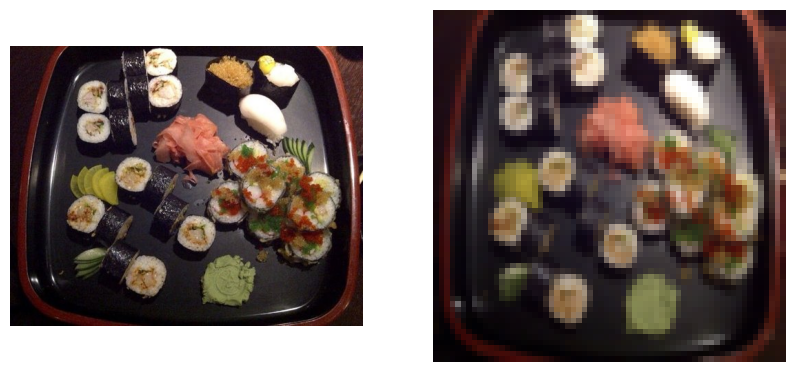

In [29]:
# Visualizing transformed images
def show_transformed_image(transform, image):
    # show image and transformed image side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
    # show image
    ax1.imshow(image)
    # show transformed image
    ax2.imshow(transform(image).permute(1, 2, 0))
    ax1.axis("off")
    ax2.axis("off")


show_transformed_image(data_transform, img)

### Option 1. Loading image data using ImageFolder dataloader

In [50]:
from torchvision import datasets

train_data = datasets.ImageFolder(root=image_path / "train", transform=data_transform, target_transform=None)
test_data = datasets.ImageFolder(root=image_path / "test", transform=data_transform, target_transform=None)

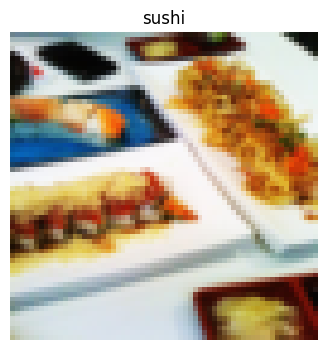

In [62]:
# Visualizing a random image with its label from train_data
random.seed(42)
random_index = random.randint(0, len(train_data))
sample_image, sample_label = train_data[random_index]
plt.figure(figsize=(4, 4))
plt.imshow(sample_image.permute(1, 2, 0))
plt.axis("off")
_ = plt.title(train_data.classes[sample_label])